In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
train = pd.read_csv(r'C:\Users\bosss\Desktop\train.csv')
test = pd.read_csv(r'C:\Users\bosss\Desktop\test.csv')
test_sub = pd.read_csv(r'C:\Users\bosss\Desktop\test_submission.csv')

C:\Users\bosss\anaconda3\envs\praktikum\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Train

In [3]:
display(train.head(10))
display(train.info())
display(train.describe())
display(train['per_square_meter_price'].describe())


,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,...,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,...,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,...,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,...,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,...,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0
5,Самара,NaN,COL_5,53.257900,50.203632,0,18,38,50,0,...,11.644737,15.823529,1875.819277,1550.818182,Самарская область,308.0,S24380,2020-01-05,100,0
6,Лаишево,NaN,COL_6,55.412357,49.561718,0,0,0,0,0,...,2.500000,2.750000,2005.500000,2013.750000,Татарстан,130.0,S14468,2020-01-05,10,0
7,Саратов,NaN,COL_7,51.521416,46.016453,0,38,117,219,0,...,6.118012,5.934783,1961.305882,1961.312500,Саратовская область,291.0,S8394,2020-01-05,10,0
8,Краснодар,NaN,COL_8,45.033280,38.976410,3,92,256,376,0,...,1.857407,1.724359,1925.483456,1921.840764,Краснодарский край,680.0,S33225,2020-01-05,100,0
9,Екатеринбург,NaN,COL_9,56.833660,60.635742,5,66,138,249,0,...,5.925676,6.125000,1967.295302,1966.200000,Свердловская область,28.0,S5897,2020-01-05,100,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279792 entries, 0 to 279791
Data columns (total 77 columns):
city                                   279792 non-null object
floor                                  103555 non-null object
id                                     279792 non-null object
lat                                    279792 non-null float64
lng                                    279792 non-null float64
osm_amenity_points_in_0.001            279792 non-null int64
osm_amenity_points_in_0.005            279792 non-null int64
osm_amenity_points_in_0.0075           279792 non-null int64
osm_amenity_points_in_0.01             279792 non-null int64
osm_building_points_in_0.001           279792 non-null int64
osm_building_points_in_0.005           279792 non-null int64
osm_building_points_in_0.0075          279792 non-null int64
osm_building_points_in_0.01            279792 non-null int64
osm_catering_points_in_0.001           279792 non-null int64
osm_catering_points_in_0.005

None

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,...,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type
count,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,...,279792.000000,265196.000000,252558.000000,263084.000000,249624.000000,263553.000000,250155.000000,279792.000000,279792.000000,279792.000000
mean,54.364078,47.763540,2.709084,40.605146,81.596171,133.285458,0.037442,0.885701,2.046467,3.748163,...,30.110661,2042.541716,644.610557,7.051233,7.360464,1967.532599,1967.988580,507.833604,54.974088,0.016058
std,4.245713,17.044625,4.202451,53.293388,105.193169,172.290136,0.391014,6.858338,14.801566,25.679859,...,27.686234,1359.884747,445.699329,3.542084,4.231369,45.807699,54.110015,1704.251771,47.856417,0.125700
min,42.651897,19.892178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.100000,10.000000,0.000000
25%,53.226600,37.582988,0.000000,7.000000,16.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,932.000000,290.000000,4.591837,4.619959,1960.070000,1959.890097,65.900000,10.000000,0.000000
50%,55.679090,39.702435,1.000000,22.000000,46.000000,77.000000,0.000000,0.000000,0.000000,0.000000,...,25.000000,1949.000000,602.000000,6.368932,6.395349,1970.890411,1971.647059,128.737034,10.000000,0.000000
75%,56.306976,55.957523,4.000000,51.000000,101.000000,164.000000,0.000000,0.000000,1.000000,2.000000,...,43.000000,2978.000000,936.000000,8.698925,9.100000,1983.701754,1986.950000,336.000000,110.000000,0.000000
max,69.500740,151.777000,46.000000,468.000000,851.000000,1392.000000,30.000000,586.000000,949.000000,1162.000000,...,289.000000,18392.000000,6105.000000,53.717949,221.666667,2019.000000,2020.000000,40000.000000,110.000000,1.000000


count    2.797920e+05
mean     1.101955e+05
std      1.720506e+05
min      3.896104e+02
25%      2.970149e+04
50%      5.971068e+04
75%      1.193000e+05
max      1.990000e+06
Name: per_square_meter_price, dtype: float64

Есть пропуски в столбцах:
 - floor
 - osm_city_nearest_population
 - reform_house_population_1000
 - reform_house_population_500            
 - reform_mean_floor_count_1000           
 - reform_mean_floor_count_500            
 - reform_mean_year_building_1000         
 - reform_mean_year_building_500  
 - street                                 

Проверим на дубликаты

In [4]:
train.duplicated().sum()

0

In [5]:
train.corr()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,...,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type
lat,1.000000,0.066425,0.073198,0.097961,0.115137,0.127294,-0.085950,-0.138579,-0.162375,-0.186287,...,-0.088545,0.085053,0.032180,0.106710,0.081504,-0.071921,-0.059077,0.025977,-0.002996,0.033998
lng,0.066425,1.000000,-0.172165,-0.207912,-0.211640,-0.212397,-0.043032,-0.058937,-0.063648,-0.068164,...,0.017317,-0.024237,-0.015682,-0.154199,-0.124749,0.055807,0.049335,-0.022858,0.011912,0.114160
osm_amenity_points_in_0.001,0.073198,-0.172165,1.000000,0.745446,0.677788,0.638178,0.054976,0.033431,0.023449,0.021155,...,0.265627,0.289474,0.192795,-0.002240,-0.035548,-0.149751,-0.136117,0.000017,0.123926,0.028932
osm_amenity_points_in_0.005,0.097961,-0.207912,0.745446,1.000000,0.967254,0.932856,0.036544,0.043737,0.036835,0.033565,...,0.434188,0.438607,0.317132,-0.041825,-0.074846,-0.245400,-0.222168,0.004926,0.108557,0.046815
osm_amenity_points_in_0.0075,0.115137,-0.211640,0.677788,0.967254,1.000000,0.985065,0.034010,0.043548,0.039911,0.036551,...,0.445707,0.470388,0.330054,-0.042188,-0.072061,-0.263689,-0.235350,0.010866,0.102777,0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reform_mean_year_building_1000,-0.071921,0.055807,-0.149751,-0.245400,-0.263689,-0.270050,-0.007576,-0.005303,-0.002836,0.000199,...,-0.220269,-0.045101,0.020625,0.331784,0.305021,1.000000,0.860733,-0.025998,-0.045284,-0.014472
reform_mean_year_building_500,-0.059077,0.049335,-0.136117,-0.222168,-0.235350,-0.238410,-0.008781,-0.007718,-0.003890,0.000188,...,-0.203445,-0.018929,0.033932,0.283311,0.313549,0.860733,1.000000,-0.022935,-0.039000,-0.012717
total_square,0.025977,-0.022858,0.000017,0.004926,0.010866,0.015934,-0.002450,-0.000571,-0.000795,-0.001563,...,-0.071369,-0.042777,-0.064890,-0.012831,-0.008281,-0.025998,-0.022935,1.000000,0.012508,-0.006952
realty_type,-0.002996,0.011912,0.123926,0.108557,0.102777,0.100415,0.022361,0.021645,0.021721,0.023660,...,0.051638,0.088589,0.038486,-0.000871,-0.010655,-0.045284,-0.039000,0.012508,1.000000,0.007683


In [6]:
train.drop(['osm_amenity_points_in_0.0075'], axis=1, inplace=True)
test.drop(['osm_amenity_points_in_0.0075'], axis=1, inplace=True)

Напишем функцию для удаления выбросов

In [7]:
def cleaning(parametr):
    Q1 = train[parametr].quantile(0.25)
    Q3 = train[parametr].quantile(0.75)
    IQR = Q3 - Q1
    data_new = train.loc[(train[parametr] < Q3+1.5*IQR) & 
                                (train[parametr] > Q1-1.5*IQR)]
    return data_new

In [8]:
train = train.loc[train['price_type'] == 1]

### city / osm_city_nearest_name

In [9]:
(train['city'] == 'Москва').sum()

91

In [10]:
(train['city'] != 'Москва').sum()

4402

In [11]:
train[train['city'] == 'Москва']['per_square_meter_price'].mean()

152145.15343655075

In [12]:
train[train['city'] == 'Санкт-Петербург']['per_square_meter_price'].mean()

210578.81152351957

In [13]:
(train['city'] == 'Санкт-Петербург').sum()

374

In [14]:
train[train['city'] == 'Новосибирск']['per_square_meter_price'].mean()

50837.893220649516

In [15]:
(train['city'] == 'Новосибирск').sum()

133

In [16]:
train[train['city'] == 'Красноярск']['per_square_meter_price'].mean()

73002.94214483195

In [17]:
train[train['city'] == 'Челябинск']['per_square_meter_price'].mean()

50231.95071657634

In [18]:
train[train['city'] != 'Москва']['per_square_meter_price'].mean()

67443.07872291286

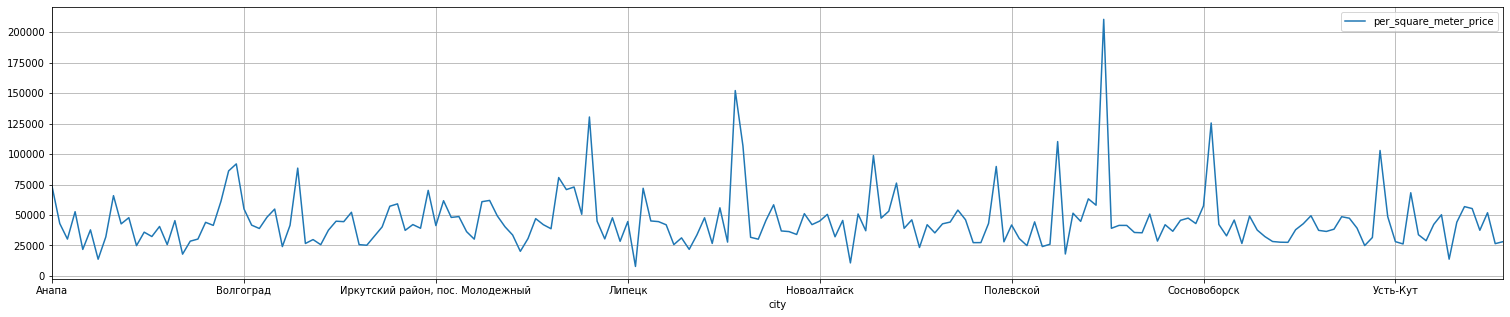

In [19]:
(train
 .pivot_table(index = 'city', values = 'per_square_meter_price', aggfunc = 'mean')
 .plot(grid = True, figsize = (26,5)))

In [20]:
train.groupby('city')['per_square_meter_price'].mean().sort_values(ascending = False).head(30)

city
Санкт-Петербург    210578.811524
Москва             152145.153437
Кудрово            130449.972414
Сочи               125538.638614
Реутов             110264.155153
Мурино             106745.776747
Уссурийск          102964.375310
Норильск            98824.646130
Владивосток         91963.969297
Подольск            89829.331765
Геленджик           88487.724866
Видное              86208.133487
Красногорск         80745.993574
Одинцово            76210.299080
Анапа               73394.305333
Красноярск          73002.942145
Луга                71945.589481
Краснодар           70864.323751
Иркутск             70229.245970
Уфа                 68279.090852
Балашиха            65883.156053
Рузаевка            63286.759529
Кингисепп           61979.952499
Казань              61751.532946
Верхняя Пышма       61212.818030
Кемерово            60940.413252
Зеленоградск        59158.667486
Нефтекамск          58405.285623
Самара              58083.600574
Сосновоборск        57520.678084
Name:

In [21]:
train.loc[train['city'] == 'Песчанокопский район, с. Красная Поляна']

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type


In [22]:
train.loc[train['city'] == 'Кавалерово']

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type


In [23]:
train_new = cleaning('per_square_meter_price')

In [24]:
train_new.groupby('city')['per_square_meter_price'].mean().sort_values(ascending = False).head(30)

city
Реутов             110264.155153
Мурино             106745.776747
Уссурийск          102964.375310
Подольск            89829.331765
Геленджик           88487.724866
Видное              86208.133487
Москва              85264.420267
Санкт-Петербург     80999.698943
Красногорск         80745.993574
Владивосток         78228.642010
Одинцово            76210.299080
Анапа               73394.305333
Луга                71945.589481
Краснодар           70864.323751
Красноярск          68252.640982
Балашиха            65883.156053
Рузаевка            63286.759529
Кингисепп           61979.952499
Казань              61751.532946
Верхняя Пышма       61212.818030
Зеленоградск        59158.667486
Нефтекамск          58405.285623
Сосновоборск        57520.678084
Зеленогорск         57218.185094
Шелехов             56899.145118
Уфа                 56378.066219
Михайловка          55929.254756
Иркутск             55410.488507
Энгельс             55300.841630
Волгоград           55018.848070
Name:

In [25]:
train_new[train_new['city'] == 'Москва']

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
275549,Москва,1,COL_15193,55.983911,37.217316,0,9,47,0,0,...,11.538462,NaN,1972.538462,NaN,Москва,40.150673,S6343,2020-01-19,100,1
275550,Москва,1,COL_15194,55.981711,37.212576,0,9,47,0,0,...,11.538462,NaN,1972.538462,NaN,Москва,225.425017,S6343,2020-01-19,100,1
275672,Москва,3,COL_21983,55.792167,37.689717,9,51,144,0,0,...,7.682692,6.900000,1954.413462,1947.800000,Москва,160.010114,S25178,2020-01-19,100,1
275888,Москва,"1,2,3",COL_35468,55.861553,37.646718,0,16,139,0,2,...,10.265823,11.153846,1975.468354,1984.769231,Москва,1060.824536,S10790,2020-02-02,100,1
276144,Москва,"1,2",COL_51120,55.670568,37.666278,4,39,143,0,1,...,8.976744,9.631579,1966.848837,1971.842105,Москва,263.782052,S2963,2020-02-09,10,1
276330,Москва,1,COL_60188,55.845689,37.436329,0,31,200,0,1,...,7.637427,7.123077,1969.491228,1968.569231,Москва,135.452328,S17182,2020-02-16,100,1
276380,Москва,1,COL_63614,55.845689,37.436797,0,31,200,0,1,...,7.637427,7.123077,1969.491228,1968.569231,Москва,134.914587,S17182,2020-02-23,100,1
276381,Москва,1,COL_63631,55.845689,37.436728,0,31,200,0,1,...,7.637427,7.123077,1969.491228,1968.569231,Москва,213.128171,S17182,2020-02-23,100,1
276382,Москва,1,COL_63632,55.845689,37.436820,0,31,200,0,1,...,7.637427,7.123077,1969.491228,1968.569231,Москва,197.818477,S17182,2020-02-23,100,1
276383,Москва,1,COL_63634,55.845689,37.436811,0,31,200,0,1,...,7.637427,7.123077,1969.491228,1968.569231,Москва,55.366935,S17182,2020-02-23,100,1


Не канает, отрезает Москву

In [26]:
display(train['city'].unique())

array(['Красноярск', 'Саратов', 'Иркутск', 'Белгород', 'Санкт-Петербург',
       'Калуга', 'Сургут', 'Кемерово', 'Новокузнецк', 'Пермь',
       'Владивосток', 'Петрозаводск', 'Нижний Новгород', 'Обнинск',
       'Брянск', 'Покачи', 'Екатеринбург', 'Арзамас', 'Калининград',
       'Канск', 'Самара', 'Первоуральск', 'Томск', 'Ангарск',
       'Сосновоборск', 'Ярославль', 'Железногорск', 'Орёл', 'Курск',
       'Ижевск', 'Усолье-Сибирское', 'Новосибирск', 'Нижнекамск',
       'Нягань', 'Иваново', 'Вологда', 'Омск', 'Верхняя Пышма', 'Орел',
       'Тула', 'Сыктывкар', 'Киров', 'Казань', 'Кострома', 'Челябинск',
       'Ростов-на-Дону', 'Барнаул', 'Вязьма', 'Усть-Илимск', 'Бородино',
       'Чайковский', 'Ленинск-Кузнецкий', 'Москва', 'Тюмень', 'Саянск',
       'Смоленск', 'Пряжа', 'Волжский', 'Нефтеюганск', 'Уфа',
       'Новое Девяткино', 'Киселевск', 'Ярцево', 'Ачинск', 'Миасс',
       'Мокшан', 'Малое Исаково', 'Воронеж', 'Анапа', 'Зеленогорск',
       'Усть-Ордынский', 'Людиново', 'Ниж

In [27]:
# train.boxplot('per_square_meter_price', figsize = (16,16))
# plt.ylim(0, 15)

In [28]:
len(train['city'].value_counts())#.head(110)

190

около 5 тыс. территорий

In [29]:
train['city'].value_counts().head(520)

Красноярск         543
Санкт-Петербург    374
Иркутск            358
Томск              227
Екатеринбург       193
                  ... 
Новозыбков           1
Одинцово             1
Бирюч                1
Десногорск           1
Медвежьегорск        1
Name: city, Length: 190, dtype: int64

In [30]:
train['city'].value_counts().sort_values().tail(600)

Медвежьегорск                1
Малое Исаково                1
Липовицы                     1
рабочий посёлок Маркова      1
Тайга                        1
                          ... 
Екатеринбург               193
Томск                      227
Иркутск                    358
Санкт-Петербург            374
Красноярск                 543
Name: city, Length: 190, dtype: int64

In [31]:
train['osm_city_nearest_name'].value_counts()

Красноярск           556
Санкт-Петербург      386
Иркутск              369
Томск                232
Екатеринбург         196
                    ... 
Каменск-Уральский      1
Артём                  1
Уссурийск              1
Королёв                1
饶河县                    1
Name: osm_city_nearest_name, Length: 108, dtype: int64

### floor

In [32]:
train['floor'].value_counts()

1.0             747
1               442
2.0             135
-1.0            121
2                74
               ... 
16.0              1
12                1
18                1
тех.этаж (6)      1
1-3               1
Name: floor, Length: 88, dtype: int64

In [33]:
train['floor'].unique()

array([nan, '2.0', '1', '-1.0', '1.0', '3.0', '18.0', 'подвал, 1', '2',
       '4.0', 'подвал', 'цоколь, 1', '1,2,антресоль', '5.0', '6.0',
       'цоколь', '9.0', '4', '5', 'тех.этаж (6)', '3', 'Подвал', 'Цоколь',
       '10', 'фактически на уровне 1 этажа', '6', '1,2,3', '1, подвал',
       '1,2,3,4', '1,2', '1,2,3,4,5', '5, мансарда', '-2.0', '10.0',
       '1-й, подвал', '12', '15', '13', '1, подвал, антресоль', '16.0',
       'мезонин', 'подвал, 1-3', '8', '7', '15.0', '1 (Цокольный этаж)',
       '3, Мансарда (4 эт)', 'подвал,1', '1, антресоль', '1-3',
       'мансарда (4эт)', '1, 2.', '9', '7.0', 'подвал , 1 ', '1, 2',
       'подвал, 1,2,3', '0.0', '1 + подвал (без отделки)', 'мансарда',
       '2,3', '4, 5', '1-й, 2-й', '18', '1 этаж, подвал', '17.0',
       '1, цоколь', 'подвал, 1-7, техэтаж', '3 (антресоль)', '1, 2, 3',
       'Цоколь, 1,2(мансарда)', 'подвал, 3. 4 этаж', 'подвал, 1-4 этаж',
       'подва, 1.2 этаж', '2, 3', '-1', '1.2', '11', '36', '7,8',
       '1 этаж', '

In [34]:
train.loc[train['floor'] == 'подвал, 1', 'floor'] = 0.75
train.loc[train['floor'] == 'подвал', 'floor'] = -1
train.loc[train['floor'] == 'цоколь, 1', 'floor'] = 0.75
train.loc[train['floor'] == '1,2,антресоль', 'floor'] = 0.85
train.loc[train['floor'] == 'цоколь', 'floor'] = -1
train.loc[train['floor'] == 'тех.этаж (6)', 'floor'] = 0.5
train.loc[train['floor'] == 'Подвал', 'floor'] = -1
train.loc[train['floor'] == 'Цоколь', 'floor'] = -1
train.loc[train['floor'] == 'фактически на уровне 1 этажа', 'floor'] = 0.75
train.loc[train['floor'] == '1,2,3', 'floor'] = 2
train.loc[train['floor'] == '1, подвал', 'floor'] = 0.75
train.loc[train['floor'] == '1,2,3,4', 'floor'] = 2
train.loc[train['floor'] == '1,2', 'floor'] = 0.85
train.loc[train['floor'] == '1,2,3,4,5', 'floor'] = 3
train.loc[train['floor'] == '5, мансарда', 'floor'] = 5
train.loc[train['floor'] == '1-й, подвал', 'floor'] = 0.75
train.loc[train['floor'] == '1, подвал, антресоль', 'floor'] = 0.75
train.loc[train['floor'] == 'мезонин', 'floor'] = 2
train.loc[train['floor'] == 'подвал, 1-3', 'floor'] = 2
train.loc[train['floor'] == '1 (Цокольный этаж)', 'floor'] = -1
train.loc[train['floor'] == '3, Мансарда (4 эт)', 'floor'] = 3
train.loc[train['floor'] == 'подвал,1', 'floor'] = 0.75
train.loc[train['floor'] == '1, антресоль', 'floor'] = 0.85
train.loc[train['floor'] == '1-3', 'floor'] = 2
train.loc[train['floor'] == 'мансарда (4эт)', 'floor'] = 4
train.loc[train['floor'] == '1, 2.', 'floor'] = 0.85
train.loc[train['floor'] == 'подвал , 1 '] = 0.75
train.loc[train['floor'] == '1, 2', 'floor'] = 0.85
train.loc[train['floor'] == 'подвал, 1,2,3', 'floor'] = 2
train.loc[train['floor'] == '1 + подвал (без отделки)', 'floor'] = 0.75
train.loc[train['floor'] == 'мансарда', 'floor'] = 2
train.loc[train['floor'] == '2,3', 'floor'] = 2
train.loc[train['floor'] == '4, 5', 'floor'] = 4
train.loc[train['floor'] == '1-й, 2-й', 'floor'] = 0.85
train.loc[train['floor'] == '1 этаж, подвал', 'floor'] = 0.75
train.loc[train['floor'] == '1, цоколь', 'floor'] = 0.75
train.loc[train['floor'] == 'подвал, 1-7, техэтаж', 'floor'] = 3
train.loc[train['floor'] == '3 (антресоль)', 'floor'] = 3
train.loc[train['floor'] == '1, 2, 3', 'floor'] = 2
train.loc[train['floor'] == 'Цоколь, 1,2(мансарда)', 'floor'] = 0.8
train.loc[train['floor'] == 'подвал, 3. 4 этаж', 'floor'] = 2
train.loc[train['floor'] == 'подвал, 1-4 этаж', 'floor'] = 2
train.loc[train['floor'] == 'подва, 1.2 этаж', 'floor'] = 0.8
train.loc[train['floor'] == '2, 3', 'floor'] = 2.5
train.loc[train['floor'] == '1.2', 'floor'] = 0.85
train.loc[train['floor'] == '7,8', 'floor'] = 7.5
train.loc[train['floor'] == '1 этаж', 'floor'] = 1
train.loc[train['floor'] == '1-й', 'floor'] = 1
train.loc[train['floor'] == '3 этаж', 'floor'] = 3
train.loc[train['floor'] == '4 этаж', 'floor'] = 4
train.loc[train['floor'] == '5 этаж', 'floor'] = 5
train.loc[train['floor'] == 'подвал,1,2,3,4,5', 'floor'] = 2
train.loc[train['floor'] == 'подвал, цоколь, 1 этаж', 'floor'] = 0.75
train.loc[train['floor'] == '3, мансарда', 'floor'] = 3

In [35]:
# train['floor'].astype('float')

In [36]:
# for i in train['floor']:
#     if type(i) != int or type(i) != float:
#         i = 'nan'
# train['floor'].value_counts()

In [37]:
train['realty_type'].unique()

array([110.  ,  10.  , 100.  ,   0.75])

In [38]:
train['realty_type'].value_counts()

10.00     2209
100.00    1329
110.00     952
0.75         3
Name: realty_type, dtype: int64

In [39]:
test['realty_type'].value_counts()

10     1478
100     873
110     623
Name: realty_type, dtype: int64

In [40]:
train = train.query('realty_type != 0.75')
train['realty_type'].value_counts()

10.0     2209
100.0    1329
110.0     952
Name: realty_type, dtype: int64

### На этом месте деление на Москву и другие города

In [41]:
len(train['reform_mean_floor_count_500'].value_counts())

2467

In [42]:
MosPg = train.query('city == "Москва" and city == "Санкт-Петербург"')

In [43]:
train_01 = train.dropna()

train_01["floor"] = pd.to_numeric(train_01["floor"])

group_floor = train_01.groupby('realty_type')['floor'].median()

for i in group_floor.index:
    train.loc[(train['realty_type'] == i) & (train['floor'].isna()), 'floor'] = group_floor[i]
    
train["floor"] = pd.to_numeric(train["floor"])

C:\Users\bosss\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4490 entries, 275299 to 279791
Data columns (total 76 columns):
city                                   4490 non-null object
floor                                  4490 non-null float64
id                                     4490 non-null object
lat                                    4490 non-null float64
lng                                    4490 non-null float64
osm_amenity_points_in_0.001            4490 non-null float64
osm_amenity_points_in_0.005            4490 non-null float64
osm_amenity_points_in_0.01             4490 non-null float64
osm_building_points_in_0.001           4490 non-null float64
osm_building_points_in_0.005           4490 non-null float64
osm_building_points_in_0.0075          4490 non-null float64
osm_building_points_in_0.01            4490 non-null float64
osm_catering_points_in_0.001           4490 non-null float64
osm_catering_points_in_0.005           4490 non-null float64
osm_catering_points_in_0.0075     

In [45]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
# train['day'] = train['date'].dt.day

In [46]:
train

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,...,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,year,month
275299,Красноярск,1.0,COL_62,56.063615,92.958428,0.0,7.0,26.0,0.0,0.0,...,1976.684211,1980.483871,Красноярский край,106.351104,S5845,2020-01-05,110.0,1.0,2020,1
275300,Саратов,1.0,COL_71,51.534581,46.020549,13.0,198.0,462.0,0.0,0.0,...,1940.591549,1939.348837,Саратовская область,175.039602,S27968,2020-01-05,10.0,1.0,2020,1
275301,Красноярск,1.0,COL_140,56.026884,92.818323,3.0,15.0,33.0,0.0,0.0,...,1976.714286,1972.878788,Красноярский край,89.534921,S23597,2020-01-05,10.0,1.0,2020,1
275302,Иркутск,1.0,COL_202,52.275528,104.251444,0.0,10.0,40.0,0.0,1.0,...,1968.098131,1975.530612,Иркутская область,419.557752,S10587,2020-01-05,10.0,1.0,2020,1
275303,Белгород,1.0,COL_207,50.576545,36.584197,4.0,48.0,92.0,0.0,0.0,...,1983.125984,1980.470588,Белгородская область,1098.703185,S11220,2020-01-05,10.0,1.0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279787,Томск,1.0,COL_280111,56.459183,84.979334,2.0,33.0,222.0,0.0,0.0,...,1972.260870,1973.460000,Томская область,358.320073,S11114,2020-08-23,10.0,1.0,2020,8
279788,Санкт-Петербург,1.0,COL_280479,59.936954,30.356383,10.0,274.0,1340.0,0.0,2.0,...,1876.994898,1873.186667,Санкт-Петербург,119.637556,S28440,2020-08-23,110.0,1.0,2020,8
279789,Калининград,3.0,COL_280518,54.729233,20.514968,0.0,12.0,84.0,0.0,2.0,...,1964.258333,1970.571429,Калининградская область,312.789725,S6671,2020-08-23,10.0,1.0,2020,8
279790,Кемерово,1.0,COL_280529,55.360680,86.081460,5.0,57.0,134.0,0.0,0.0,...,1957.425532,1954.625000,Кемеровская область,89.201305,S17667,2020-08-23,110.0,1.0,2020,8


In [47]:
train.drop(['date', 'lat', 'lng', 'street', 'id'], axis=1, inplace=True)
# train = train.fillna(method='ffill').fillna(method='bfill')

In [48]:
train.fillna(0, inplace=True)
# train.drop(['street', 'date'], axis=1, inplace=True)

In [49]:
# group_floor_count_500 = train.groupby('reform_mean_year_building_500')['reform_mean_floor_count_500'].median()
# # group_population.head(20)

# for i in group_floor_count_500.index:
#     train.loc[((train['reform_mean_year_building_500'] == i) & 
#               (train['reform_mean_floor_count_500'].isna())), 'reform_mean_floor_count_500'] = group_floor_count_500[i]
    
    
    
# group_floor_count_1000 = train.groupby('reform_mean_year_building_1000')['reform_mean_floor_count_1000'].median()

# for i in group_floor_count_1000.index:
#     train.loc[((train['reform_mean_year_building_1000'] == i) & 
#               (train['reform_mean_floor_count_1000'].isna())), 'reform_mean_floor_count_1000'] = group_floor_count_1000[i]

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4490 entries, 275299 to 279791
Data columns (total 73 columns):
city                                   4490 non-null object
floor                                  4490 non-null float64
osm_amenity_points_in_0.001            4490 non-null float64
osm_amenity_points_in_0.005            4490 non-null float64
osm_amenity_points_in_0.01             4490 non-null float64
osm_building_points_in_0.001           4490 non-null float64
osm_building_points_in_0.005           4490 non-null float64
osm_building_points_in_0.0075          4490 non-null float64
osm_building_points_in_0.01            4490 non-null float64
osm_catering_points_in_0.001           4490 non-null float64
osm_catering_points_in_0.005           4490 non-null float64
osm_catering_points_in_0.0075          4490 non-null float64
osm_catering_points_in_0.01            4490 non-null float64
osm_city_closest_dist                  4490 non-null float64
osm_city_nearest_name            

### Обработаем тестовую выборку

In [51]:
display(test.head(10))
display(test.info())
display(test.describe())

,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,...,reform_mean_year_building_1000,reform_mean_year_building_500,region,lat,lng,total_square,street,date,realty_type,price_type
0,Курск,1.0,COL_289284,7,55,117,0,0,0,0,...,1966.471591,1966.740260,Курская область,51.709255,36.147908,156.148996,S6983,2020-09-06,100,1
1,Сургут,1.0,COL_289305,8,70,140,0,0,0,0,...,1988.259259,1989.068182,Ханты-Мансийский АО,61.233240,73.462509,190.737943,S29120,2020-09-06,110,1
2,Тюмень,-1.0,COL_289318,3,28,122,0,0,0,0,...,1985.880282,1991.458333,Тюменская область,57.143110,65.554573,457.118051,S23731,2020-09-06,10,1
3,Иркутск,1.0,COL_289354,5,76,231,0,0,0,0,...,1947.073276,1941.657895,Иркутская область,52.281380,104.282975,66.503622,S14207,2020-09-06,100,1
4,Курск,NaN,COL_289399,8,105,279,0,0,2,9,...,1948.764151,1946.689655,Курская область,51.729706,36.194019,23.864915,S20658,2020-09-06,10,1
5,Иркутск,1.0,COL_289428,0,18,33,0,0,0,0,...,1963.606557,1968.923077,Иркутская область,52.276260,104.361172,58.377812,S14771,2020-09-06,10,1
6,Кемерово,NaN,COL_289460,1,5,20,0,0,0,0,...,1987.169811,1983.529412,Кемеровская область,55.335796,86.188306,42.680123,S14240,2020-09-06,10,1
7,Красноярск,NaN,COL_289493,3,20,85,0,0,0,0,...,1988.352381,1991.304348,Красноярский край,56.033775,92.908111,1008.665423,S5105,2020-09-06,100,1
8,Нижний Новгород,NaN,COL_289495,0,61,125,0,0,0,0,...,1956.846626,1960.461538,Нижегородская область,56.240772,43.866936,798.269341,S4928,2020-09-06,110,1
9,Томск,1.0,COL_289749,1,31,64,0,0,0,0,...,1963.440476,1957.315789,Томская область,56.503025,84.998339,123.697803,S25851,2020-09-06,110,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 75 columns):
city                                   2974 non-null object
floor                                  1673 non-null object
id                                     2974 non-null object
osm_amenity_points_in_0.001            2974 non-null int64
osm_amenity_points_in_0.005            2974 non-null int64
osm_amenity_points_in_0.01             2974 non-null int64
osm_building_points_in_0.001           2974 non-null int64
osm_building_points_in_0.005           2974 non-null int64
osm_building_points_in_0.0075          2974 non-null int64
osm_building_points_in_0.01            2974 non-null int64
osm_catering_points_in_0.001           2974 non-null int64
osm_catering_points_in_0.005           2974 non-null int64
osm_catering_points_in_0.0075          2974 non-null int64
osm_catering_points_in_0.01            2974 non-null int64
osm_city_closest_dist                  2974 non-null float64
osm

None

,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,...,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,lat,lng,total_square,realty_type,price_type
count,2974.00000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,...,2926.000000,2939.000000,2926.000000,2939.000000,2926.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.0
mean,3.47579,56.622058,188.180901,0.028917,0.447209,0.949227,1.603564,0.886348,14.358440,29.464358,...,782.044087,6.213200,6.450586,1964.728803,1965.403824,55.466594,63.153755,406.735382,57.367182,1.0
std,4.94299,79.150088,268.308805,0.215067,2.342604,5.335099,9.886568,2.044048,29.650378,61.126387,...,442.373946,2.513380,2.988967,31.747532,36.133107,3.479215,26.592173,1063.619932,47.218940,0.0
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1625.304054,1403.214286,42.814200,20.142404,7.279623,10.000000,1.0
25%,0.00000,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,...,488.000000,4.617053,4.571429,1959.597205,1958.500000,53.217885,36.581435,97.288057,10.000000,1.0
50%,2.00000,32.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,10.000000,...,736.000000,5.658915,5.750000,1969.900000,1970.703637,55.978571,60.546986,181.066253,100.000000,1.0
75%,4.00000,60.000000,193.000000,0.000000,0.000000,1.000000,1.000000,1.000000,11.000000,23.000000,...,978.000000,7.160740,7.727885,1980.825432,1983.838773,56.837790,87.202715,368.433009,100.000000,1.0
max,47.00000,446.000000,1375.000000,4.000000,98.000000,247.000000,490.000000,20.000000,166.000000,318.000000,...,2893.000000,29.838710,26.857143,2015.583333,2020.000000,69.356995,132.872232,31124.725426,110.000000,1.0


In [52]:
# test_01["floor"].unique()

In [53]:
test.loc[test['floor'] == 'подвал, 1', 'floor'] = 0.75
test.loc[test['floor'] == 'подвал', 'floor'] = -1
test.loc[test['floor'] == 'цоколь, 1', 'floor'] = 0.75
test.loc[test['floor'] == '1,2,антресоль', 'floor'] = 0.85
test.loc[test['floor'] == 'цоколь', 'floor'] = -1
test.loc[test['floor'] == 'тех.этаж (6)', 'floor'] = 0.5
test.loc[test['floor'] == 'Подвал', 'floor'] = -1
test.loc[test['floor'] == 'Цоколь', 'floor'] = -1
test.loc[test['floor'] == 'фактически на уровне 1 этажа', 'floor'] = 0.75
test.loc[test['floor'] == '1,2,3', 'floor'] = 2
test.loc[test['floor'] == '1, подвал', 'floor'] = 0.75
test.loc[test['floor'] == '1,2,3,4', 'floor'] = 2
test.loc[test['floor'] == '1,2', 'floor'] = 0.85
test.loc[test['floor'] == '1,2,3,4,5', 'floor'] = 3
test.loc[test['floor'] == '5, мансарда', 'floor'] = 5
test.loc[test['floor'] == '1-й, подвал', 'floor'] = 0.75
test.loc[test['floor'] == '1, подвал, антресоль', 'floor'] = 0.75
test.loc[test['floor'] == 'мезонин', 'floor'] = 2
test.loc[test['floor'] == 'подвал, 1-3', 'floor'] = 2
test.loc[test['floor'] == '1 (Цокольный этаж)', 'floor'] = -1
test.loc[test['floor'] == '3, Мансарда (4 эт)', 'floor'] = 3
test.loc[test['floor'] == 'подвал,1', 'floor'] = 0.75
test.loc[test['floor'] == '1, антресоль', 'floor'] = 0.85
test.loc[test['floor'] == '1-3', 'floor'] = 2
test.loc[test['floor'] == 'мансарда (4эт)', 'floor'] = 4
test.loc[test['floor'] == '1, 2.', 'floor'] = 0.85
test.loc[test['floor'] == 'подвал , 1 '] = 0.75
test.loc[test['floor'] == '1, 2', 'floor'] = 0.85
test.loc[test['floor'] == 'подвал, 1,2,3', 'floor'] = 2
test.loc[test['floor'] == '1 + подвал (без отделки)', 'floor'] = 0.75
test.loc[test['floor'] == 'мансарда', 'floor'] = 2
test.loc[test['floor'] == '2,3', 'floor'] = 2
test.loc[test['floor'] == '4, 5', 'floor'] = 4
test.loc[test['floor'] == '1-й, 2-й', 'floor'] = 0.85
test.loc[test['floor'] == '1 этаж, подвал', 'floor'] = 0.75
test.loc[test['floor'] == '1, цоколь', 'floor'] = 0.75
test.loc[test['floor'] == 'подвал, 1-7, техэтаж', 'floor'] = 3
test.loc[test['floor'] == '3 (антресоль)', 'floor'] = 3
test.loc[test['floor'] == '1, 2, 3', 'floor'] = 2
test.loc[test['floor'] == 'Цоколь, 1,2(мансарда)', 'floor'] = 0.8
test.loc[test['floor'] == 'подвал, 3. 4 этаж', 'floor'] = 2
test.loc[test['floor'] == 'подвал, 1-4 этаж', 'floor'] = 2
test.loc[test['floor'] == 'подва, 1.2 этаж', 'floor'] = 0.8
test.loc[test['floor'] == '2, 3', 'floor'] = 2.5
test.loc[test['floor'] == '1.2', 'floor'] = 0.85
test.loc[test['floor'] == '7,8', 'floor'] = 7.5
test.loc[test['floor'] == '1 этаж', 'floor'] = 1
test.loc[test['floor'] == '1-й', 'floor'] = 1
test.loc[test['floor'] == '3 этаж', 'floor'] = 3
test.loc[test['floor'] == '4 этаж', 'floor'] = 4
test.loc[test['floor'] == '5 этаж', 'floor'] = 5
test.loc[test['floor'] == 'подвал,1,2,3,4,5', 'floor'] = 2
test.loc[test['floor'] == 'подвал, цоколь, 1 этаж', 'floor'] = 0.75
test.loc[test['floor'] == '3, мансарда', 'floor'] = 3
test.loc[test['floor'] == 'цоколь, 1, 2,3,4,5,6', 'floor'] = 3
test.loc[test['floor'] == ' 1, 2, Антресоль', 'floor'] = 2
test.loc[test['floor'] == '3 этаж, мансарда (4 этаж)', 'floor'] = 3
test.loc[test['floor'] == 'цокольный', 'floor'] = -1
test.loc[test['floor'] == '1,2 ', 'floor'] = 0.85
test.loc[test['floor'] == '3,4', 'floor'] = 3
test.loc[test['floor'] == 'подвал, 1 и 4 этаж', 'floor'] = 0.5
test.loc[test['floor'] == 'технический этаж,5,6', 'floor'] = 5
test.loc[test['floor'] == ' 1-2, подвальный', 'floor'] = -1.5
test.loc[test['floor'] == '1, 2, 3, мансардный', 'floor'] = 2
test.loc[test['floor'] == 'подвал, 1, 2, 3', 'floor'] = 0.8
test.loc[test['floor'] == '1,2,3, антресоль, технический этаж', 'floor'] = 2
test.loc[test['floor'] == '3, 4', 'floor'] = 3
test.loc[test['floor'] == '1-3 этажи, цоколь (188,4 кв.м), подвал (104 кв.м)', 'floor'] = 0.8
test.loc[test['floor'] == '1, 2 этаж', 'floor'] = 0.85
test.loc[test['floor'] == '2-й', 'floor'] = 2
test.loc[test['floor'] == '1 (по док-м цоколь)', 'floor'] = 0.75
test.loc[test['floor'] == '1,2,подвал ', 'floor'] = 0.8
test.loc[test['floor'] == 'подвал, 2', 'floor'] = 0.7
test.loc[test['floor'] == '1,2,3 этаж, подвал', 'floor'] = 0.8
test.loc[test['floor'] == '2, 3, 4, тех.этаж', 'floor'] = 3
test.loc[test['floor'] == 'цокольный, 1,2', 'floor'] = 0.8
test.loc[test['floor'] == 'Техническое подполье', 'floor'] = -1.5
test.loc[test['floor'] == '5(мансарда)', 'floor'] = 5
test.loc[test['floor'] == '1,2,3,4, подвал', 'floor'] = 0.5
test.loc[test['floor'] == 'подвал, 1, 2', 'floor'] = 0.8
test.loc[test['floor'] == '1-7', 'floor'] = 4
test.loc[test['floor'] == 'подвал,1,2,3', 'floor'] = 0.5

In [54]:
test_01 = test.dropna()

test_01["floor"] = pd.to_numeric(test_01["floor"])

# group_floor = train_01.groupby('realty_type')['floor'].median()

for i in group_floor.index:
    test.loc[(test['realty_type'] == i) & (test['floor'].isna()), 'floor'] = group_floor[i]
    
test["floor"] = pd.to_numeric(test["floor"])

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 75 columns):
city                                   2974 non-null object
floor                                  2974 non-null float64
id                                     2974 non-null object
osm_amenity_points_in_0.001            2974 non-null float64
osm_amenity_points_in_0.005            2974 non-null float64
osm_amenity_points_in_0.01             2974 non-null float64
osm_building_points_in_0.001           2974 non-null float64
osm_building_points_in_0.005           2974 non-null float64
osm_building_points_in_0.0075          2974 non-null float64
osm_building_points_in_0.01            2974 non-null float64
osm_catering_points_in_0.001           2974 non-null float64
osm_catering_points_in_0.005           2974 non-null float64
osm_catering_points_in_0.0075          2974 non-null float64
osm_catering_points_in_0.01            2974 non-null float64
osm_city_closest_dist                  29

C:\Users\bosss\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
test['date']

0       2020-09-06
1       2020-09-06
2       2020-09-06
3       2020-09-06
4       2020-09-06
           ...    
2969    2020-12-27
2970    2020-12-27
2971    2020-12-27
2972    2020-12-27
2973    2020-12-27
Name: date, Length: 2974, dtype: object

In [56]:
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
# test['day'] = test['date'].dt.day
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 77 columns):
city                                   2974 non-null object
floor                                  2974 non-null float64
id                                     2974 non-null object
osm_amenity_points_in_0.001            2974 non-null float64
osm_amenity_points_in_0.005            2974 non-null float64
osm_amenity_points_in_0.01             2974 non-null float64
osm_building_points_in_0.001           2974 non-null float64
osm_building_points_in_0.005           2974 non-null float64
osm_building_points_in_0.0075          2974 non-null float64
osm_building_points_in_0.01            2974 non-null float64
osm_catering_points_in_0.001           2974 non-null float64
osm_catering_points_in_0.005           2974 non-null float64
osm_catering_points_in_0.0075          2974 non-null float64
osm_catering_points_in_0.01            2974 non-null float64
osm_city_closest_dist                  29

In [57]:
test_id = test['id']
test.drop(['date', 'lat', 'lng', 'street', 'id'], axis=1, inplace=True)
# test['floor'].fillna('unknown', inplace=True)
# test = test.fillna(method='ffill').fillna(method='bfill')

test.fillna(0, inplace=True)

### Выделим целевой 

In [58]:
target_train = train['per_square_meter_price']
feature_train = train.drop(['per_square_meter_price'], axis = 1)

### OrdinalEncoder / StandardScaler

In [59]:
feature_train_test = pd.concat((feature_train, test))
feature_train_test

,city,floor,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,realty_type,price_type,year,month
275299,Красноярск,1.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,0.0,...,7.136842,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,110.0,1.0,2020,1
275300,Саратов,1.0,13.0,198.0,462.0,0.0,0.0,0.0,0.0,4.0,...,4.144608,4.164557,1940.591549,1939.348837,Саратовская область,175.039602,10.0,1.0,2020,1
275301,Красноярск,1.0,3.0,15.0,33.0,0.0,0.0,0.0,0.0,0.0,...,6.851429,5.742424,1976.714286,1972.878788,Красноярский край,89.534921,10.0,1.0,2020,1
275302,Иркутск,1.0,0.0,10.0,40.0,0.0,1.0,1.0,1.0,0.0,...,4.597222,5.469388,1968.098131,1975.530612,Иркутская область,419.557752,10.0,1.0,2020,1
275303,Белгород,1.0,4.0,48.0,92.0,0.0,0.0,6.0,6.0,1.0,...,9.157480,9.088235,1983.125984,1980.470588,Белгородская область,1098.703185,10.0,1.0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,Красноярск,4.0,0.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,...,5.730769,6.333333,1972.153846,1982.250000,Красноярский край,2149.546362,100.0,1.0,2020,12
2970,Томск,1.0,2.0,33.0,222.0,0.0,0.0,1.0,1.0,1.0,...,5.714286,5.882353,1972.260870,1973.460000,Томская область,359.371061,10.0,1.0,2020,12
2971,Калуга,-1.0,2.0,25.0,99.0,0.0,0.0,0.0,2.0,1.0,...,3.983871,4.909091,1966.390244,1966.904762,Калужская область,87.820453,100.0,1.0,2020,12
2972,Нижний Новгород,1.0,13.0,70.0,158.0,0.0,0.0,0.0,0.0,8.0,...,3.829268,4.529412,1938.331361,1946.529412,Нижегородская область,208.625735,10.0,1.0,2020,12


In [60]:
kategor = ['city', 'osm_city_nearest_name', 'region']

encoder = OrdinalEncoder()
encoder.fit(feature_train_test[kategor])
feature_train_test[kategor] = encoder.transform(feature_train_test[kategor])
# test[kategor] = encoder.transform(test[kategor])

In [61]:
# encoder.fit(test[kategor])

In [62]:
feature_train = feature_train_test[:4490]
test = feature_train_test[4490:]

In [63]:
test

,city,floor,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,realty_type,price_type,year,month
0,90.0,1.0,7.0,55.0,117.0,0.0,0.0,0.0,0.0,0.0,...,4.325000,4.211268,1966.471591,1966.740260,20.0,156.148996,100.0,1.0,2020,9
1,193.0,1.0,8.0,70.0,140.0,0.0,0.0,0.0,0.0,0.0,...,5.389831,5.500000,1988.259259,1989.068182,46.0,190.737943,110.0,1.0,2020,9
2,209.0,-1.0,3.0,28.0,122.0,0.0,0.0,0.0,0.0,0.0,...,7.915493,8.250000,1985.880282,1991.458333,43.0,457.118051,10.0,1.0,2020,9
3,58.0,1.0,5.0,76.0,231.0,0.0,0.0,0.0,0.0,0.0,...,3.276860,3.012048,1947.073276,1941.657895,10.0,66.503622,100.0,1.0,2020,9
4,90.0,1.0,8.0,105.0,279.0,0.0,0.0,2.0,9.0,1.0,...,4.346154,4.827586,1948.764151,1946.689655,20.0,23.864915,10.0,1.0,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,85.0,4.0,0.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,...,5.730769,6.333333,1972.153846,1982.250000,19.0,2149.546362,100.0,1.0,2020,12
2970,204.0,1.0,2.0,33.0,222.0,0.0,0.0,1.0,1.0,1.0,...,5.714286,5.882353,1972.260870,1973.460000,41.0,359.371061,10.0,1.0,2020,12
2971,64.0,-1.0,2.0,25.0,99.0,0.0,0.0,0.0,2.0,1.0,...,3.983871,4.909091,1966.390244,1966.904762,12.0,87.820453,100.0,1.0,2020,12
2972,121.0,1.0,13.0,70.0,158.0,0.0,0.0,0.0,0.0,8.0,...,3.829268,4.529412,1938.331361,1946.529412,26.0,208.625735,10.0,1.0,2020,12


In [64]:
sclaler = StandardScaler()
sclaler.fit(feature_train_test)
feature_train = sclaler.transform(feature_train)
test = sclaler.transform(test)

In [65]:
test

array([[-0.33009524, -0.22712793,  0.67078566, ...,  0.        ,
         0.        ,  0.58809626],
       [ 1.37370733, -0.22712793,  0.86737526, ...,  0.        ,
         0.        ,  0.58809626],
       [ 1.63837569, -1.48326521, -0.11557278, ...,  0.        ,
         0.        ,  0.58809626],
       ...,
       [-0.76018132, -1.48326521, -0.31216238, ...,  0.        ,
         0.        ,  1.41620917],
       [ 0.18269971, -0.22712793,  1.85032331, ...,  0.        ,
         0.        ,  1.41620917],
       [ 0.18269971,  0.40094071, -0.50875199, ...,  0.        ,
         0.        ,  1.41620917]])

### Проведем обучение

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [67]:
# def scorer(target, prediction):
#     deviation = np.sum(target - prediction) / target
#     if deviation < -0.6:
#         hit = 9.9
#     elif -0.6 <= deviation < -0.15:
#         hit = 1.1 * (1 + deviation/0.15)**2
#     elif -0.15 <= deviation < 0.15:
#         hit = 0
#     elif 0.15 <= deviation < 0.6:
#         hit = (deviation/0.15 - 1)**2
#     elif deviation >= 0.6:
#         hit = 9
        
#     itog = np.sum(hit) / len(target)
    
#     return itog

# scorer = make_scorer(scorer, greater_is_better = False)

## LGBMRegressor

In [68]:
# %%time

# model_lgb = LGBMRegressor()

# param = {'n_estimators': range(10, 30, 5), #range(60, 200, 20),
#         'num_leaves': range(2, 8, 2)}#range(5, 27, 2)}

# grid_gbm = GridSearchCV(model_lgb, param, cv=5, verbose = True)
# grid_gbm.fit(feature_train, target_train)
# print(grid_gbm.best_estimator_)

## CatBoostRegressor

In [69]:
model_cat = CatBoostRegressor(iterations=1000,
                          learning_rate=0.001,
                          verbose=False,
                          loss_function='RMSE')

In [70]:
%%time

param = {'l2_leaf_reg': [1, 9, 20],
        'learning_rate': [0.001, 0.01, 0.1],
        'depth': [4, 6, 8]} #10, 12]}

grid = model_cat.grid_search(param, X=feature_train, y=target_train)


bestTest = 80545.20067
bestIteration = 999

0:	loss: 80545.2006726	best: 80545.2006726 (0)	total: 5.59s	remaining: 2m 25s

bestTest = 71463.29869
bestIteration = 999

1:	loss: 71463.2986863	best: 71463.2986863 (1)	total: 10.5s	remaining: 2m 10s

bestTest = 69472.12785
bestIteration = 687

2:	loss: 69472.1278504	best: 69472.1278504 (2)	total: 15s	remaining: 2m

bestTest = 81421.47265
bestIteration = 999

3:	loss: 81421.4726466	best: 69472.1278504 (2)	total: 19.7s	remaining: 1m 53s

bestTest = 72598.43873
bestIteration = 999

4:	loss: 72598.4387326	best: 69472.1278504 (2)	total: 25.3s	remaining: 1m 51s

bestTest = 71222.01093
bestIteration = 488

5:	loss: 71222.0109348	best: 69472.1278504 (2)	total: 31.5s	remaining: 1m 50s

bestTest = 82048.15074
bestIteration = 999

6:	loss: 82048.1507355	best: 69472.1278504 (2)	total: 37s	remaining: 1m 45s

bestTest = 73110.27648
bestIteration = 999

7:	loss: 73110.2764808	best: 69472.1278504 (2)	total: 41.5s	remaining: 1m 38s

bestTest = 70709.93502


In [71]:
model_grid = CatBoostRegressor(iterations=2000,
                          verbose=False,
                          loss_function='RMSE',
                          **grid['params'])

In [72]:
%%time

model_grid.fit(feature_train, target_train)

Wall time: 11.6 s


### Сделаем предикт на тесте

In [83]:
predictions = model_grid.predict(test)

In [84]:
predictions = predictions * 0.75
predictions

array([36957.6837001 , 32353.99349074, 23728.81177404, ...,
       28353.8411533 , 44991.9885273 , 35159.28283887])

In [85]:
result = pd.DataFrame({'id': test_id, 'per_square_meter_price': predictions})

In [86]:
result.to_csv('predictions_06.csv')